## HW 2 - MANAR AWIDA 

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import animation
import pydot
import EoN
import random
random.seed(42)
import community as community_louvain
from networkx.algorithms import community
import networkx.algorithms.community as nx_comm
from statistics import mean
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
import collections
import matplotlib.pyplot as plt
import networkx as nx

from netgraph import Graph


Convert CSV to Pandas Dataframe

In [2]:
students = pd.read_csv(r'C:\Users\IMOE001\Desktop\pseco and cogni\HW2\rice-facebook-undergrads-users-attributes.csv')  

In [3]:
edges = pd.read_csv(r'C:\Users\IMOE001\Desktop\pseco and cogni\HW2\rice-univ-facebook-edges.csv')  

From DataFrame to Network Graph

In [4]:
# add edges from the edges df:

G=nx.from_pandas_edgelist(edges, 'source', 'target')

In [5]:
#add nodes from the student nodes :

G.add_nodes_from(students.node)

In [6]:
college = pd.Series(students.college.values, index=students.node).to_dict()
age = pd.Series(students.age.values, index=students.node).to_dict()
major = pd.Series(students.major.values, index=students.node).to_dict()

In [7]:
# set nodes the relevent attributes:

nx.set_node_attributes(G, college,  'college')
nx.set_node_attributes(G, age,  'age')
nx.set_node_attributes(G, major,  'major')


Analyse the data

In [8]:
college_range = set(students['college'])
age_range = set(students['age'])
major_range = set(students['major'])

print("college ID Range :" + str(college_range))
print("Age of students Range :" + str(age_range))
print("Major courses ID Range :" + str(major_range))

college ID Range :{1, 2, 3, 4, 5, 6, 7, 8, 9}
Age of students Range :{18, 19, 20, 21, 22}
Major courses ID Range :{1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 53, 54, 55, 57, 60}


In [9]:
v=[str(x) for x in college_range]

In [10]:
def get_graph_info(graph):
    print("Number of nodes:", graph.number_of_nodes())
    print("Number of edges:", graph.number_of_edges())
    print("Average Cluster Coefficients:", nx.average_clustering(graph))
    print("Connected components:", len(list(nx.connected_components(graph))))

In [11]:
get_graph_info(G)

Number of nodes: 1216
Number of edges: 42443
Average Cluster Coefficients: 0.2958360909565447
Connected components: 12


#### about the Connected components, we got 12 because we have 11 nodes with degree = 0 , which mean that this student dont have facebook friends from the university

In [12]:
degree_0 = []
for i in G.degree:
    if i[1] == 0:
        degree_0.append(i[0])

In [13]:
# nodes with degree = 0 :
print(degree_0)
print(len(degree_0))

[3851, 1150, 5450, 5698, 4729, 1300, 4919, 642, 2014, 5035, 3916]
11


plots :

In [14]:
age_per =students['age'].value_counts(normalize=True) * 100
major_per =students['major'].value_counts(normalize=True) * 100
college_per =students['college'].value_counts(normalize=True) * 100

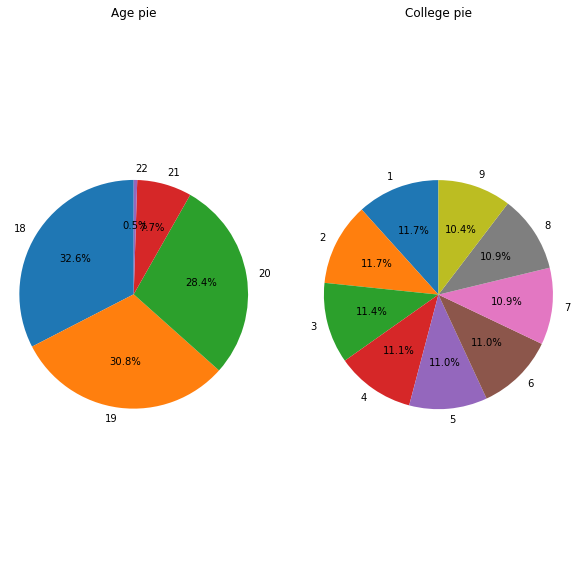

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,10))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
# Age pie :
ax1.set_title('Age pie')
age_labels = '18', '19', '20', '21','22'
age_sizes = age_per
ax1.pie(age_sizes,  labels=age_labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# College pie:

ax2.set_title('College pie')
major_labels = v
major_sizes = college_per 
ax2.pie(major_sizes,  labels=major_labels, autopct='%1.1f%%', startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.show()


# Qusteion 1 :

### 1-a :

In [39]:
def spsific_attribute(df):
    att_list = {}
    for  att in df.columns[1:]:
        LL =[]
        for i in list(set(df[att])) :
            L=list(df.loc[df[att] == i].node)
            LL.append(L)
        att_list[att] = LL 
    return att_list


In [40]:
att_list = spsific_attribute(students)

The modularity value of attribute Age :

In [19]:
nx_comm.modularity(G, att_list['age'])

0.25930923446104415

The modularity value of attribute College :

In [20]:
nx_comm.modularity(G, att_list['college'])

0.38514224101346395

The modularity value of attribute Major :

In [21]:
nx_comm.modularity(G, att_list['major'])

0.05446785427704566

## 1-b :

#### From the results of Modularity, it can be seen that the Modularity of the network (facebook frindships)  based on the college , is the highest value,  this means that the partition of a network by the college have dense connections between the nodes within modules. against  partition of a network by  major of study or there age .

## 1-c

In [41]:
# Louvain Algorithm
partition = community_louvain.best_partition(G)


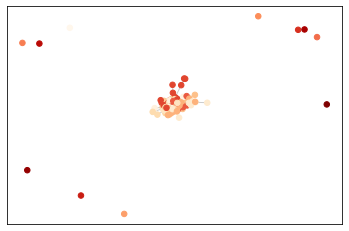

In [42]:
pos = nx.spring_layout(G)

cmap = cm.get_cmap('OrRd', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=30,cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.2)
plt.show()

to visualize it tbetter, I removed the nodes with a zero degree

In [8]:
H = G.copy()
degree_0 = []
for i in G.degree:
    if i[1] == 0:
        degree_0.append(i[0])

#nodes that sont have any friend from the uni
degree_0 
for node in degree_0:
    H.remove_node(node)

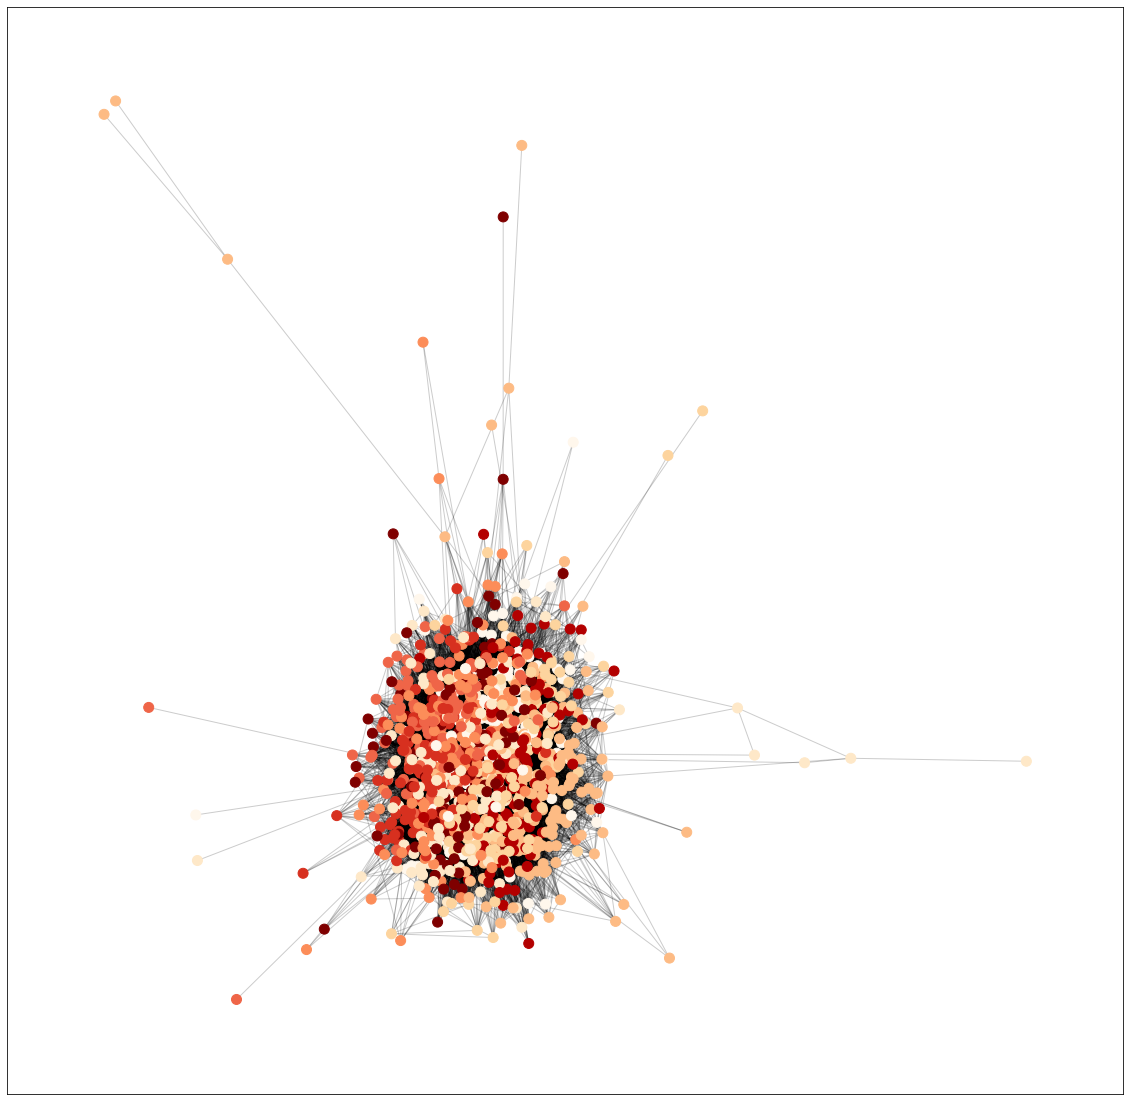

In [9]:
plt.rcParams["figure.figsize"] = (20,20)
partition = community_louvain.best_partition(H)
pos = nx.spring_layout(H)

cmap = cm.get_cmap('OrRd', max(partition.values()) + 1)
nx.draw_networkx_nodes(H, pos, partition.keys(), node_size=100,cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(H, pos, alpha=0.2)
plt.show()

### c- i :

In [22]:
# get the node in every partition
groups = set(partition.values())
lou = {el:[] for el in groups}
for node in partition:
    L = list(lou[partition[node]])
    L.append(node)
    lou[partition[node]] = L

In [25]:
def statistics(lou):
    ages_1 = []
    college_1 = []
    major_1 =[]
    for i in lou:    
        ages_1.append(G.nodes.data()[i]['age'])
        college_1.append(G.nodes.data()[i]['college'])
        major_1.append(G.nodes.data()[i]['major'])
    print("Age %s " % collections.Counter(ages_1))
    print("College %s " %collections.Counter(college_1))
    print("Major %s " %collections.Counter(major_1))
    
# going throu every community in the partition and print the statistics of the community
for i in range(len(lou)):
    print(" community "+ str(i) +" :\n")
    statistics(lou[i])
    print("\n\n")
    

 community 0 :

Age Counter({21: 1}) 
College Counter({1: 1}) 
Major Counter({9: 1}) 



 community 1 :

Age Counter({22: 1}) 
College Counter({3: 1}) 
Major Counter({10: 1}) 



 community 2 :

Age Counter({22: 1}) 
College Counter({2: 1}) 
Major Counter({5: 1}) 



 community 3 :

Age Counter({21: 45, 22: 40, 20: 36, 19: 11, 18: 1}) 
College Counter({8: 130, 4: 1, 6: 1, 2: 1}) 
Major Counter({8: 13, 31: 10, 9: 9, 5: 9, 22: 9, 10: 7, 54: 6, 34: 5, 17: 5, 3: 5, 21: 5, 14: 4, 35: 4, 7: 4, 20: 4, 28: 3, 40: 3, 11: 3, 33: 3, 24: 3, 18: 2, 32: 2, 39: 2, 1: 2, 6: 2, 26: 2, 53: 1, 15: 1, 2: 1, 30: 1, 51: 1, 25: 1, 38: 1}) 



 community 4 :

Age Counter({22: 42, 21: 38, 20: 25, 19: 5}) 
College Counter({4: 108, 6: 1, 3: 1}) 
Major Counter({8: 12, 22: 9, 5: 8, 9: 7, 3: 6, 10: 6, 18: 5, 40: 5, 21: 4, 53: 4, 31: 4, 17: 4, 35: 4, 33: 4, 14: 3, 54: 3, 34: 3, 1: 3, 37: 2, 2: 2, 26: 2, 44: 1, 23: 1, 27: 1, 48: 1, 30: 1, 11: 1, 29: 1, 28: 1, 7: 1, 49: 1}) 



 community 5 :

Age Counter({22: 46, 21:

#### And from the results we got, it is easy to see that the most common value for nodes in community of  students is college. 

### c- ii :

In [26]:
lv =[]
for i in lou:
    lv.append(lou[i])

the modularity after the partition of  Louvain algorithm :

In [28]:
nx_comm.modularity(G, lv)

0.3940233372385318

#### It is possible to prepare that the value is really close to the value of modularity according to the college
#### And this is consistent with the conclusion from c-i

# Qusteion 2 :

#### 1- Quantity of those infected per unit of time:
###### It is possible to notice at any time how many new infections have been added and according to this figure it is possible to deduce the rate of infections.
#### 2- Network deployment time:
###### You can take the last time and speculate if the virus spreads quickly
#### 3- Is it possible to paste recoverers:
###### You can check if each pair of nodes has a doubling and a different time, so this means that the same two nodes infected each other at a different time and this means that the virus can affect recoverers.

#### Research questions that fit these dimensions
<ul>
<li> What is the rate of infection per unit time?</li>
<li> How long does it take to paste all the possible nodes to paste on the network?</li>
<li> Is it possible to paste a node that has recovered in the network one more time?</li>
</ul>

# Qusteion 3 :

### 3 - 1 :


<ul>
<li>c => average number of contacts between infected and susceptible individuals</li>
<li>b => chance of infection in case of contact</li>
<li>beta => b*c  represents the effective transmission rate</li> 
<li>gamma => 1/(duration of the effect / illness)</li>
<li>R => Recovered</li>
</ul>

In [9]:
N = len(G.nodes) # number of nodes nodes
c = 5 # average number of contacts between infected and susceptible individuals
b = 0.25 # chance of infection in case of contact
beta = b*c
gamma = 0.1 # 1/(duration of the effect / illness)
r_0 = beta/gamma 

### 3 - 2 :

In [10]:
# get the dgree of every node and sort it:
node_degree = {}
for i in G.nodes:
    node_degree[i] = G.degree[i]
    
node_degree = {k: v for k, v in sorted(node_degree.items(), key=lambda item: item[1])}

TOption A - student with the most friends :

In [11]:
A =list(node_degree )[-1]
A

1018

Option B - 3 students with the least number of friends :

In [12]:
# the student of having just one friend 
count =3
B =[]
for i in node_degree :
    if node_degree [i]!=0 and count!= 0: # check if they have one contant and not zero
        B .append(i)
        count = count-1
B

[4501, 4898, 6090]

### 3 - 3 :

## a

In [13]:
def Gillespie_SIR(G,I0,beta,gamma):
    """ in this example we will run 100 stochastic simulations.
                Each simulation will produce output at a different set
                of times.  In order to calculate an average we will use
                subsample to find the epidemic sizes at a specific set
                of times given by report_times.
    """
    report_times = np.linspace(0,5,101)
    Ssum = np.zeros(len(report_times))
    Isum = np.zeros(len(report_times))
    Rsum = np.zeros(len(report_times))
    iterations = 100
    for counter in range(iterations): 
        t, S, I, R = EoN.Gillespie_SIR(G, tau=beta, gamma=gamma ,initial_infecteds=I0)
        #t, S, I, and R have an entry for every single event.
        newS, newI, newR = EoN.subsample(report_times, t, S, I, R)
        #could also do: newI = EoN.subsample(report_times, t, I)
        plt.plot(report_times, newS, linewidth=1, alpha = 0.4)
        plt.plot(report_times, newI, linewidth=1, alpha = 0.4)
        plt.plot(report_times, newR, linewidth=1, alpha = 0.4)
        Ssum += newS
        Isum += newI
        Rsum += newR
    Save = Ssum / float(iterations)
    Iave = Isum / float(iterations)
    Rave = Rsum / float(iterations)
    plt.plot(report_times, Save, "--", linewidth = 5, label = "S")
    plt.plot(report_times, Iave, "--", linewidth = 5,label = "I")
    plt.plot(report_times, Rave, "--", linewidth = 5,label = "R")
    plt.legend(loc = "upper right")
    plt.savefig("tmp.pdf")

A simulation in which the student of option A

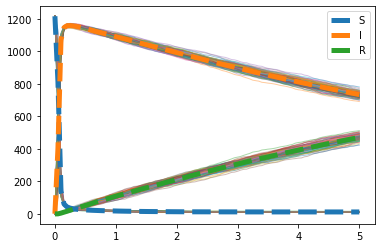

In [14]:
I0 = A # intial number of infected individuals 

Gillespie_SIR(G,I0,beta,gamma)

A simulation in which the student of option B

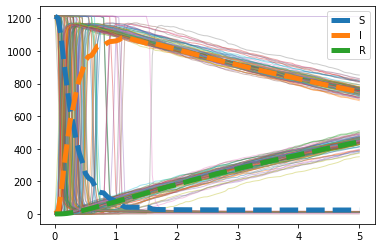

In [15]:
I0 = B # intial number of infected individuals 

Gillespie_SIR(G,I0,beta,gamma)

In [17]:
simA = EoN.Gillespie_SIR(G, tau=beta, gamma=gamma, initial_infecteds=A , return_full_data=True)
simB = EoN.Gillespie_SIR(G, tau=beta, gamma=gamma, initial_infecteds=B , return_full_data=True)


In [18]:
simA.summary()

(array([0.00000000e+00, 5.42153252e-03, 8.13580867e-03, ...,
        6.87611632e+01, 7.36159239e+01, 8.15953008e+01]),
 {'S': array([1215, 1214, 1213, ...,   13,   13,   13]),
  'I': array([1, 2, 3, ..., 2, 1, 0]),
  'R': array([   0,    0,    0, ..., 1201, 1202, 1203])})

In [23]:
simB.summary()

(array([ 0.        ,  0.73947265,  1.06110774, ..., 70.83935637,
        76.4919847 , 90.36034818]),
 {'S': array([1213, 1212, 1211, ...,   11,   11,   11]),
  'I': array([3, 4, 5, ..., 2, 1, 0]),
  'R': array([   0,    0,    0, ..., 1203, 1204, 1205])})

In [22]:
simA.transmissions()[-1]

(2.585110967202306, 1658, 4788)

In [21]:
simB.transmissions()[-1]

(2.984543614796018, 6119, 3376)

In [26]:
simA.node_history(6119)

([0, 0.05777431087806914, 9.312273702887184], ['S', 'I', 'R'])

we can see here the last time when the simulation finish , and A finish before B

(<AxesSubplot:>,
 [<AxesSubplot:title={'center':'$S$'}>,
  <AxesSubplot:title={'center':'$I$'}>,
  <AxesSubplot:title={'center':'$R$'}, xlabel='$t$'>])

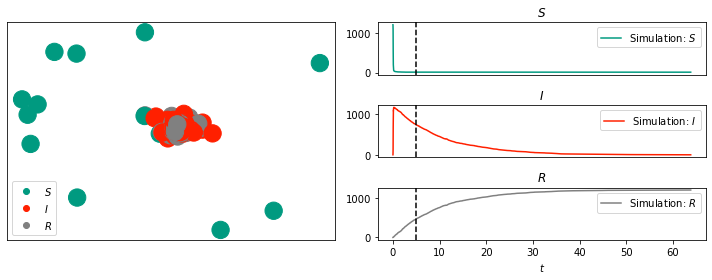

In [91]:
simA.display(5)

(<AxesSubplot:>,
 [<AxesSubplot:title={'center':'$S$'}>,
  <AxesSubplot:title={'center':'$I$'}>,
  <AxesSubplot:title={'center':'$R$'}, xlabel='$t$'>])

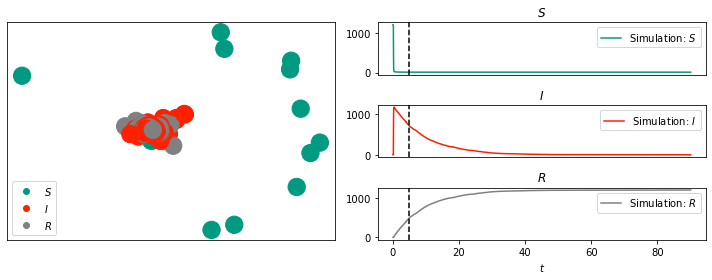

In [92]:
simB.display(5)

## Conclusion

Regarding question 2 ، we will refer to the part of the end of the experiment, the first experiment ends earlier and this means that there is a faster perception.
As for the conception per unit of time, it can be assumed in this model that in the first model everything had a more point of conception time at the beginning and after a certain time it started to be the opposite (my assumption without experimentation and testing)

### b :

#### From the two simulations it can be deduced when I have one patient in contact with a lot of people, the transfer rate is high and also in a short time it can be seen that it has reached everyone.
#### Compared to three students with only one contact, it took longer to reach all the students

### 3 - 4 :

# Choosing influences with a lot of followers for product marketing : 
We live in the Instagram world, where there are a lot of influencers, so for example if a company wants to launch a new product it would be better to take one influencer (this is what usually happens) with a lot of followers and let him launch their product. On the other hand, if they give the product to ordinary people with a low number of followers, then it will pass slowly between the people and in general if the man is not influential and he is a regular person then it is not certain that the product will pass at all. Because if I follow an influencer it is not because of forming friendships with him but to enjoy the things he adds to me and gives me suggestions on.
From the two simulations and with the help of the function Sim.node_history(node)  it can be concluded that each node that has become recovering, is no longer affected

#  Ordinary people choices with fewer followers: 

I would think of a situation where the company that markets a product, it does not just want to market it but to assimilate it and get people to make it for a certain lifetime.
For example a grooming product, which will be given to a lot of ordinary people and these people will use it and move their barrel and the plate of the product slowly so that it reaches the state of everyone who used it, they take it to a certain lifestyle and an important part of its day.